## Stochastic Gradient Descent on Linear Regression 

Tired of squeezing in your workout between the gym's rush hour? Imagine a world where you can stride into your fitness haven without the crowd, waiting, or fuss. Welcome to our journey of predicting the prime gym hours with precision.

In this project, we're diving into the realm of data, sweat, and smart predictions. Using the "Crowdedness at the Campus Gym" dataset, we're building a Stochastic Gradient Descent on Linear Regression model that becomes your fitness oracle. Say goodbye to the gym grind and hello to your dream workout schedule.

Below is the data dictionary:
- number_people: this is the number of people at the gym at each observation. This will be our target variable or label.
- date: a string value with the specific date and time information.
- timestamp: an integer (int), with the number of seconds since the start of the day (00:00).
- dayofweek: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- is_weekend: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- is_holiday: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- temperature: a float, defining the temperature during the day of the observation in Fahrenheit.
- isstartof_semester: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- is_during_semester: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- month: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- hour: an integer (int) for the hour of the day from 0 to 23.

Get ready to sculpt your physique, not your schedule. Let's unveil the secret sauce to your ideal gym experience!

### Import Libraries

In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

### Load the Dataset

To get started, let's load the dataset in so that we can start examining it.

In [2]:
#load the dataset
gym = pd.read_csv('crowdness_gym_data.csv')

#print the information on the dataset
gym.info()

#examine the dataset
gym.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


The dataset comprises of 62184 rows and 11 columns. There are no missing values in the datset. 

At the moment, the only feature that looks problematic is the date column, since it is an object and we already have other features that give us the specific day and time, I will get rid of the date column completely using .drop(). I will also get rid of the time stamp column since we already have the hour. Then run .head() again to ensure the columns are gone.

In [3]:
#drop the date column
gym = gym.drop(['date','timestamp'], axis = 1)
gym.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


### Explore and Clean the Data

I am going to start my analysis by examining some individual features. I will be plotting a histogram of the month, hour and day columns. 

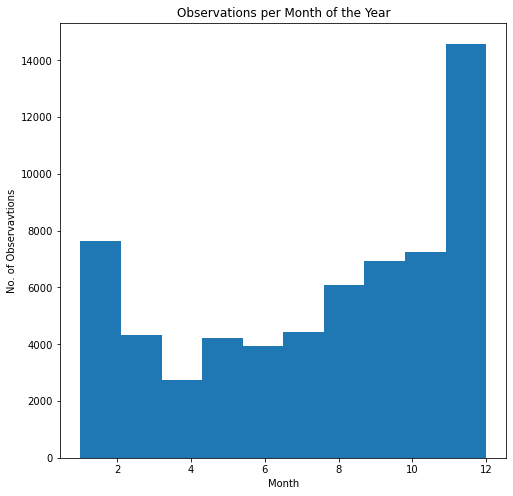

In [4]:
#plot a distribution for the month column
plt.figure(figsize=(8, 8))
plt.hist(gym['month'])
plt.title("Observations per Month of the Year")
plt.xlabel('Month')
plt.ylabel('No. of Observavtions')
plt.show()       

From the histogram above, we can see that we had the most observations in January and December probably because they are the most popular times to visit the gym. We can also see more obervations at the begining of the semester (August), then at the end, probably because everyone is very excited at the beguning and very busy at the end (March, April).

Next i will be plotting the distribution for each day of the week.

<Figure size 576x576 with 0 Axes>

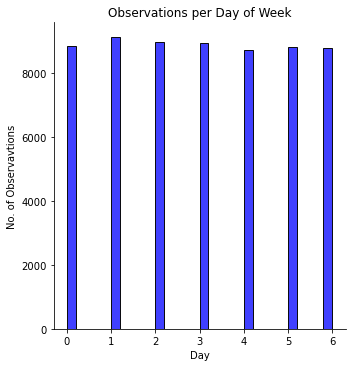

In [5]:
#plot a distribution for the day_of_week column
plt.figure(figsize=(8, 8))
sns.displot(gym['day_of_week'], color='b')
plt.title("Observations per Day of Week")
plt.xlabel('Day')
plt.ylabel('No. of Observavtions')
plt.show()  

There is not a lot of information to extract from this distribution other than tuesday being the day with the highest observation but with no much difference.

The next distribution i will examine is that of the hour of the day.

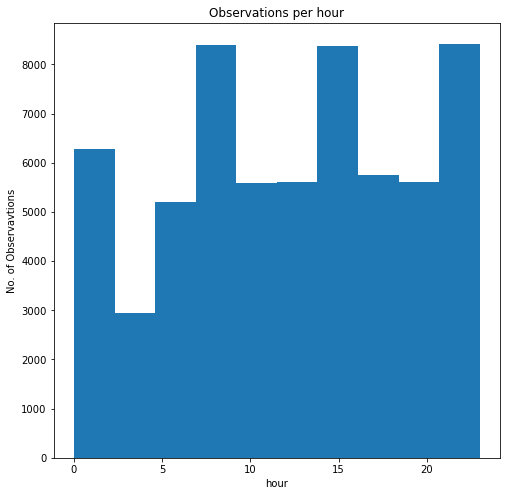

In [6]:
#plot a distribution for the hour column
plt.figure(figsize=(8, 8))
plt.hist(gym['hour'])
plt.title("Observations per hour")
plt.xlabel('hour')
plt.ylabel('No. of Observavtions')
plt.show()    

The above visualisation is an interesting one, but just in case, there are a lot of observations at early morning and mid afternoon, which is expected, but the one at midnight are a surprise. Seems like there are night owls going to the gym.

The next step is to examine correlation between columns. One way to do that is to visualise it using the heat map. 

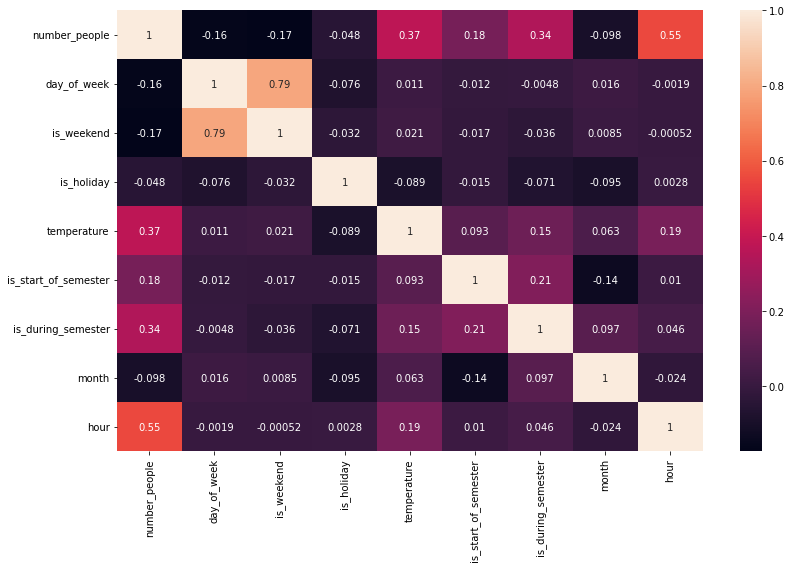

In [7]:
#examine the correlation between columns
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(gym.corr(), annot=True, ax=ax)

plt.tight_layout()
plt.show()

From the above visualisation, we see that there is high correlation between the following columns and our outcome:
 - temperature
 - is_during_semester
 - hour
 
We wil be using them as predictors for our model.

### Build the Model

Before building our model, we will first divide our dataset into training set and test set. 

In [8]:
# divide the data using train_test_split
X = gym[['temperature','is_during_semester','hour']]
y = gym["number_people"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 745)

Now that we've divided up the data into both a training and test set, we're ready to build our SGD linear regresssion model.

In [9]:
#scale the training set
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#build the model
model1 = SGDRegressor(random_state=51)
model1.fit(X_train, y_train)

SGDRegressor(random_state=51)

### Model Evaluation

Once the model is trained, it's time to make some predictions with the test data and measure model performance. For this project, we will be using the mean_squared_error and r2_score to evaluate its performance.

In [10]:
#caluculate the mean squared error
predictions = model1.predict(X_test)

rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

16.751341032435153

In [11]:
#calculate the coefficient of determination
R2 = r2_score(y_test,predictions)
R2

0.4563065170642945

We can notice from the values of the 'rmse' and 'R2' that our model is not incredibly accurate. WIth the R2, we see there is a correlation of 0.456, wich is not terrible as we need to be as close to 1 as posssible (the closer to 1, the higher the accuracy)

To try and imprive the model, we will expore the parameters of the SGDRegrressor.

In [12]:
#build the model
model2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state= 51)
model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)

#calculate the rmse
rmse = mean_squared_error(y_test, predictions2, squared=False)
rmse

16.797451236577405

In [13]:
R2 = r2_score(y_test,predictions2)
R2

0.4533092261158862

With the scaled data, the model performs fairly better, slightly increasing the Mean Squared Error and decreasing the R2 score by 0.003

### Visualize the Results

To see how our model performs, the best way is to visualize it. Here is the plot from our first model, using line plots with the actual test data on the back and the predicted data on the front. The parts where the plots converge are the points where the model performed well, and the divergence in the plots is where the model performed poorly.

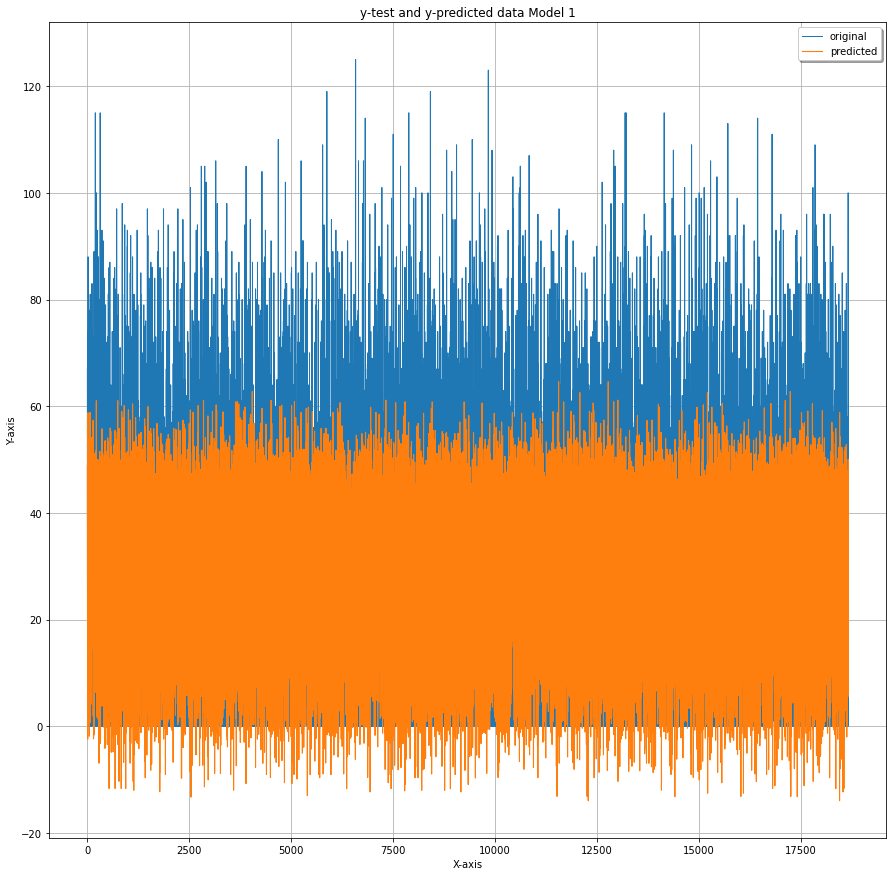

In [14]:
#plot a line plot for model 1
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, predictions, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

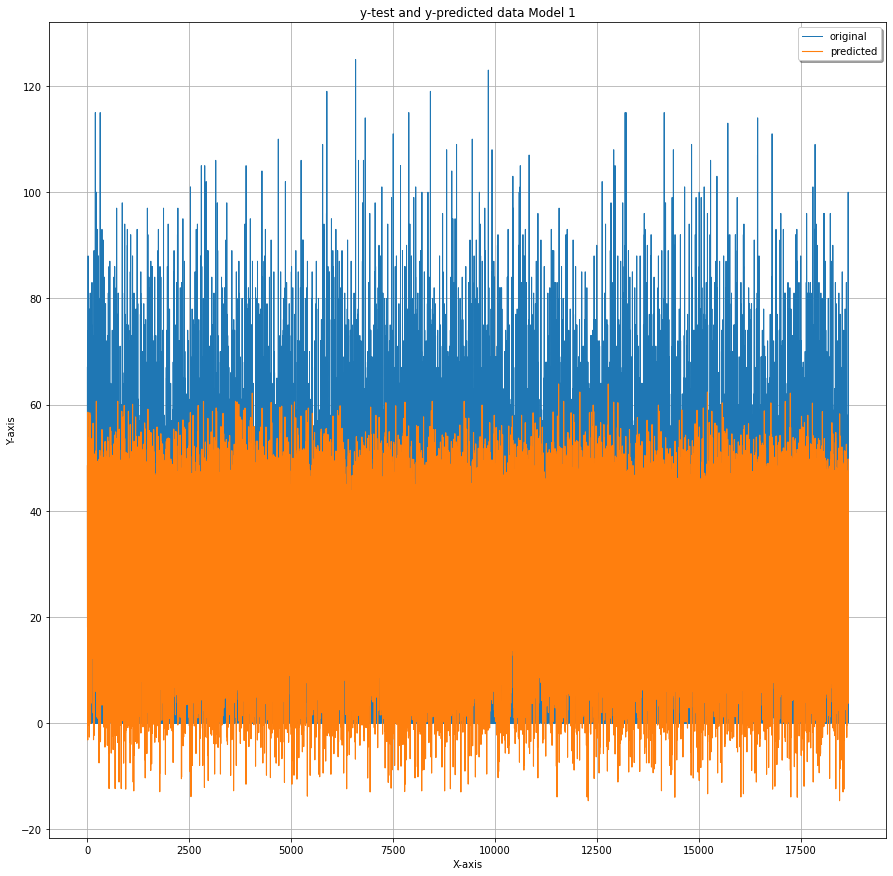

In [15]:
#plot a line plot for model 2
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, predictions2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Summarize the Results

There is evident room for enhancement, yet a promising initial step for constructing a prediction model is to employ a linear regression model with Stochastic Gradient Descent.

We can enhance the model through some modifications. Concerning the data, I opted to eliminate the timestamp variable, deeming it redundant. However, it's possible that retaining this redundancy might contribute to improved model accuracy. 
It may also be necessary to experiment with some parameters like the loss and changing rate to improve the model.

In general, based on the data and the model, if you prefer going to the gym with fewer people around and you're an early riser, it appears that 5am on any day would be a reliable choice.